<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n250.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.525900,42.805828,55.724939,56.262625,-2.071808,227.247484,227.984574,-0.737089
1,0.0,1.0,63.120964,44.204337,92.672202,90.176898,-1.679158,298.495244,301.387572,-2.892327
2,0.0,2.0,77.176258,87.353880,46.956792,28.120895,-0.857250,248.750575,249.728614,-0.978039
3,0.0,3.0,57.289666,54.214990,79.815855,27.362892,-2.905689,225.777714,227.041669,-1.263955
4,0.0,4.0,64.756210,66.114686,31.454866,73.809832,-3.023764,243.111831,246.075663,-2.963832
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.578584,93.278188,94.758457,51.142270,5.651123,290.408621,285.557611,4.851010
29996,999.0,26.0,83.237657,29.321560,43.711528,47.956444,2.017954,216.245141,214.126895,2.118246
29997,999.0,27.0,69.392306,70.891266,57.877757,84.725522,-2.055129,290.831722,289.936715,0.895007
29998,999.0,28.0,82.299693,33.998215,88.465916,91.367907,-3.448596,302.683135,303.735154,-1.052018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.525900,42.805828,55.724939,56.262625,-2.071808,227.247484,227.984574,-0.737089
1,0.0,1.0,63.120964,44.204337,92.672202,90.176898,-1.679158,298.495244,301.387572,-2.892327
2,0.0,2.0,77.176258,87.353880,46.956792,28.120895,-0.857250,248.750575,249.728614,-0.978039
3,0.0,3.0,57.289666,54.214990,79.815855,27.362892,-2.905689,225.777714,227.041669,-1.263955
4,0.0,4.0,64.756210,66.114686,31.454866,73.809832,-3.023764,243.111831,246.075663,-2.963832
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.578584,93.278188,94.758457,51.142270,5.651123,290.408621,285.557611,4.851010
29996,999.0,26.0,83.237657,29.321560,43.711528,47.956444,2.017954,216.245141,214.126895,2.118246
29997,999.0,27.0,69.392306,70.891266,57.877757,84.725522,-2.055129,290.831722,289.936715,0.895007
29998,999.0,28.0,82.299693,33.998215,88.465916,91.367907,-3.448596,302.683135,303.735154,-1.052018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -2.071808  227.247484   
      1.0    63.120964  44.204337  92.672202  90.176898 -1.679158  298.495244   
      2.0    77.176258  87.353880  46.956792  28.120895 -0.857250  248.750575   
      3.0    57.289666  54.214990  79.815855  27.362892 -2.905689  225.777714   
      4.0    64.756210  66.114686  31.454866  73.809832 -3.023764  243.111831   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   35.578584  93.278188  94.758457  51.142270  5.651123  290.408621   
      26.0   83.237657  29.321560  43.711528  47.956444  2.017954  216.245141   
      27.0   69.392306  70.891266  57.877757  84.725522 -2.055129  290.831722   
      28.0   82.299693  33.998215  88.465916  91.367907 -3.448596  302.683135   
      29.0   21.790254  58.183842  43.189578  58.861446  2.994193  195.019313   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    227.984574 -0.737089  
      1.0    301.387572 -2.892327  
      2.0    249.728614 -0.978039  
      3.0    227.041669 -1.263955  
      4.0    246.075663 -2.963832  
...                 ...       ...  
999.0 25.0   285.557611  4.851010  
      26.0   214.126895  2.118246  
      27.0   289.936715  0.895007  
      28.0   303.735154 -1.052018  
      29.0   191.525377  3.493936  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -2.071808  227.247484   
      1.0    63.120964  44.204337  92.672202  90.176898 -1.679158  298.495244   
      2.0    77.176258  87.353880  46.956792  28.120895 -0.857250  248.750575   
      3.0    57.289666  54.214990  79.815855  27.362892 -2.905689  225.777714   
      4.0    64.756210  66.114686  31.454866  73.809832 -3.023764  243.111831   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   35.578584  93.278188  94.758457  51.142270  5.651123  290.408621   
      26.0   83.237657  29.321560  43.711528  47.956444  2.017954  216.245141   
      27.0   69.392306  70.891266  57.877757  84.725522 -2.055129  290.831722   
      28.0   82.299693  33.998215  88.465916  91.367907 -3.448596  302.683135   
      29.0   21.790254  58.183842  43.189578  58.861446  2.994193  195.019313   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    227.984574 -0.737089  
      1.0    301.387572 -2.892327  
      2.0    249.728614 -0.978039  
      3.0    227.041669 -1.263955  
      4.0    246.075663 -2.963832  
...                 ...       ...  
999.0 25.0   285.557611  4.851010  
      26.0   214.126895  2.118246  
      27.0   289.936715  0.895007  
      28.0   303.735154 -1.052018  
      29.0   191.525377  3.493936  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.525900,42.805828,55.724939,56.262625,-2.071808,227.247484,227.984574,-0.737089
1,0.0,1.0,63.120964,44.204337,92.672202,90.176898,-1.679158,298.495244,301.387572,-2.892327
2,0.0,2.0,77.176258,87.353880,46.956792,28.120895,-0.857250,248.750575,249.728614,-0.978039
3,0.0,3.0,57.289666,54.214990,79.815855,27.362892,-2.905689,225.777714,227.041669,-1.263955
4,0.0,4.0,64.756210,66.114686,31.454866,73.809832,-3.023764,243.111831,246.075663,-2.963832
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.578584,93.278188,94.758457,51.142270,5.651123,290.408621,285.557611,4.851010
29996,999.0,26.0,83.237657,29.321560,43.711528,47.956444,2.017954,216.245141,214.126895,2.118246
29997,999.0,27.0,69.392306,70.891266,57.877757,84.725522,-2.055129,290.831722,289.936715,0.895007
29998,999.0,28.0,82.299693,33.998215,88.465916,91.367907,-3.448596,302.683135,303.735154,-1.052018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -2.071808  227.247484   
      1.0    63.120964  44.204337  92.672202  90.176898 -1.679158  298.495244   
      2.0    77.176258  87.353880  46.956792  28.120895 -0.857250  248.750575   
      3.0    57.289666  54.214990  79.815855  27.362892 -2.905689  225.777714   
      4.0    64.756210  66.114686  31.454866  73.809832 -3.023764  243.111831   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   35.578584  93.278188  94.758457  51.142270  5.651123  290.408621   
      26.0   83.237657  29.321560  43.711528  47.956444  2.017954  216.245141   
      27.0   69.392306  70.891266  57.877757  84.725522 -2.055129  290.831722   
      28.0   82.299693  33.998215  88.465916  91.367907 -3.448596  302.683135   
      29.0   21.790254  58.183842  43.189578  58.861446  2.994193  195.019313   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    227.984574 -0.737089  
      1.0    301.387572 -2.892327  
      2.0    249.728614 -0.978039  
      3.0    227.041669 -1.263955  
      4.0    246.075663 -2.963832  
...                 ...       ...  
999.0 25.0   285.557611  4.851010  
      26.0   214.126895  2.118246  
      27.0   289.936715  0.895007  
      28.0   303.735154 -1.052018  
      29.0   191.525377  3.493936  

[30000 rows x 8 columns]

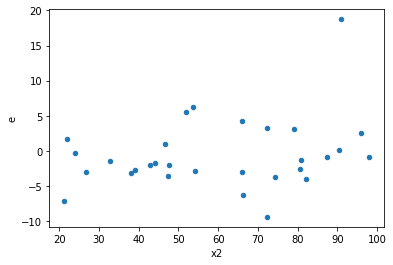

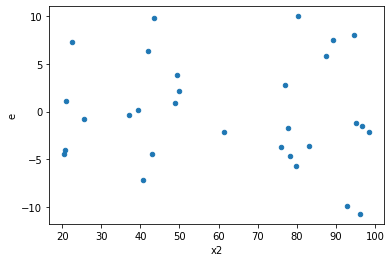

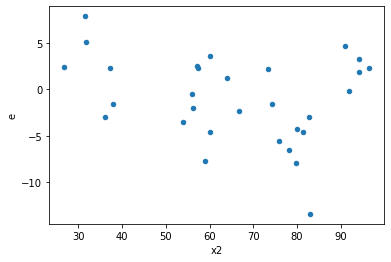

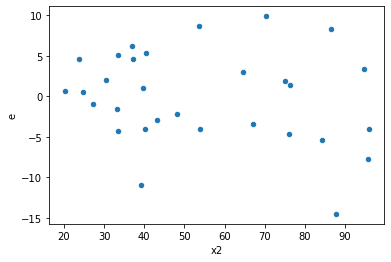

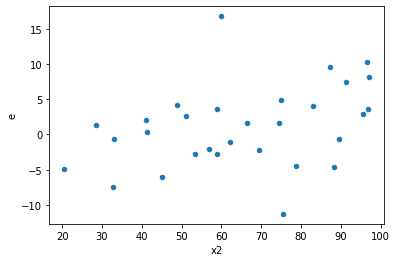

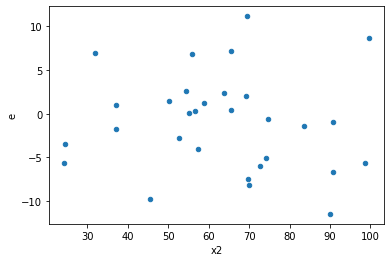

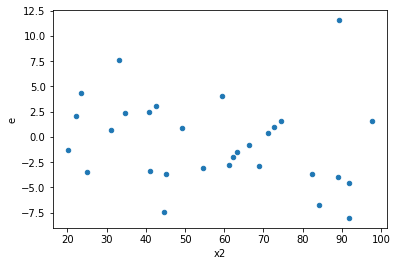

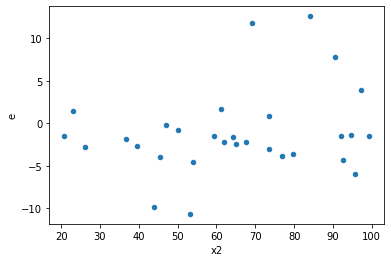

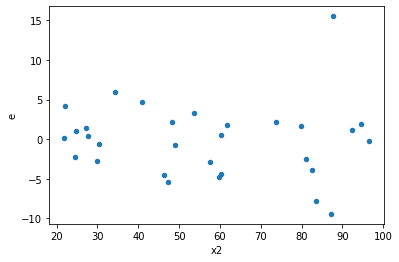

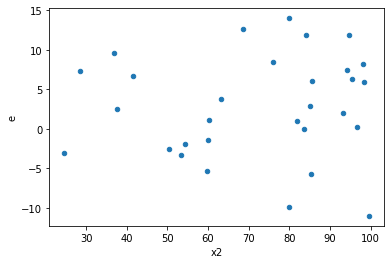

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,35.947283558743415,215.9162522485077,4.493410444842927,26.989531531063463,6.006469220286623,0.020232364272902315,0.9898838178635488,0.010116182136451157,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,161.86462825376861,435.5295374585658,20.233078531721077,54.44119218232073,2.69070236133215,0.18304778496717522,0.9084761075164124,0.09152389248358761,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,96.75655409914489,382.25944084323044,12.094569262393112,47.782430105403805,3.950734339417827,0.06899618612980785,0.9655019069350961,0.03449809306490392,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,53.10035856820237,170.95591828330242,6.637544821025296,21.369489785412803,3.219487078674352,0.11835152199482013,0.9408242390025899,0.059175760997410065,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,178.72759793582205,484.43866253579176,22.340949741977756,60.55483281697397,2.710486058844394,0.17994550621809036,0.9100272468909548,0.08997275310904518,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,112.49621015030903,126.65493815514596,14.062026268788628,15.831867269393245,1.1258595999449146,0.8709440270253448,0.5645279864873276,0.4354720135126724,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,100.46694808017692,259.8022367099488,12.558368510022115,32.4752795887436,2.5859473356612313,0.20060130356221118,0.8996993482188944,0.10030065178110559,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,72.67150832110786,286.6571240891554,9.083938540138483,35.832140511144424,3.9445599893499685,0.06929237934085508,0.9653538103295725,0.03464618967042754,Reject001=1 : Homoscedasticity
9.0,8.0,8.0,169.86069874945136,378.32187670621636,21.23258734368142,47.290234588277045,2.2272478536324067,0.2783611662896188,0.8608194168551906,0.1391805831448094,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,35.947283558743415,215.9162522485077,4.493410444842927,26.989531531063463,6.006469220286623,0.020232364272902315,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,161.86462825376861,435.5295374585658,20.233078531721077,54.44119218232073,2.69070236133215,0.18304778496717522,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,104.35870249498984,52.18439812154129,13.04483781187373,6.5230497651926616,0.5000483608355193,0.3466595519082505,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,96.75655409914489,382.25944084323044,12.094569262393112,47.782430105403805,3.950734339417827,0.06899618612980785,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,53.10035856820237,170.95591828330242,6.637544821025296,21.369489785412803,3.219487078674352,0.11835152199482013,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,178.72759793582205,484.43866253579176,22.340949741977756,60.55483281697397,2.710486058844394,0.17994550621809036,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,112.49621015030903,126.65493815514596,14.062026268788628,15.831867269393245,1.1258595999449146,0.8709440270253448,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,100.46694808017692,259.8022367099488,12.558368510022115,32.4752795887436,2.5859473356612313,0.20060130356221118,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,72.67150832110786,286.6571240891554,9.083938540138483,35.832140511144424,3.9445599893499685,0.06929237934085508,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      954
Reject001=0 : Heteroscedasticity     46
Name: Result_test, dtype: int64